# 직원 이직 분석

* 직원의 이직여부과 관련해서 분석을 하려고 한다.
* 최근 이직율이 증가하는 것에 대해, 이직여부에 영향을 주는 요인에 대해 분석하여, 직원들이 회사를 떠나지 않도록 인사 프로그램을 준비하려고 합니다.

![](https://adoptostaging.blob.core.windows.net/media/employee-attrition-reasons-9LIqMv.jpg)

## 0.환경설정

### 1) 라이브러리 로딩

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

### 2) 데이터 로딩

In [71]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_NA.CSV"
data = pd.read_csv(path)
data['Attrition'] = np.where(data['Attrition']=='Yes', 1, 0)
data.tail(10)

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
1240,0,32,Travel_Rarely,Research & Development,6.0,5,Life Sciences,231,3,Male,...,No,20,1,0,8,2,3,5,4,4
1241,0,29,Travel_Rarely,Sales,19.0,3,Life Sciences,1497,3,Male,...,No,14,3,2,10,3,3,10,7,4
1242,0,31,Non-Travel,Research & Development,1.0,4,Medical,308,3,Male,...,No,12,4,1,6,2,3,5,4,4
1243,0,27,Travel_Rarely,Research & Development,5.0,1,Technical Degree,844,3,Male,...,Yes,16,2,1,9,3,3,9,8,8
1244,0,32,Travel_Rarely,Research & Development,5.0,2,Life Sciences,1555,4,Female,...,No,12,1,1,12,2,3,7,1,5
1245,0,27,Travel_Rarely,Research & Development,19.0,3,Other,1619,4,Male,...,No,11,1,2,7,3,3,7,7,7
1246,0,29,Travel_Rarely,Research & Development,9.0,3,Life Sciences,1558,3,Male,...,No,18,1,2,5,2,2,1,0,0
1247,0,29,Non-Travel,Sales,2.0,3,Life Sciences,469,4,Male,...,No,14,1,1,4,3,2,4,3,2
1248,0,43,Travel_Rarely,Sales,16.0,3,Marketing,327,4,Female,...,Yes,22,3,1,22,3,3,17,13,9
1249,0,26,Travel_Rarely,Research & Development,NaN,4,Medical,1177,1,Male,...,No,22,2,1,8,2,3,8,7,7


|	변수 명	|	내용	|	구분	|
|	----	|	----	|	----	|
|	**Attrition**	|	이직여부, Yes = 1 , No = 0	|	**Target**	|
|	Age	|	나이	|	숫자	|
|	BusinessTravel	|	출장 빈도(범주)	|		|
|	Department	|	현 부서	|		|
|	DistanceFromHome	|	집-직장 거리(마일)	|	숫자	|
|	Education	|	교육수준(범주)	|	1 Below College, 2 College, 3 Bachelor, 4 Master, 5 Doctor	|
|	EducationField	|	전공	|		|
|	EmployeeNumber	|	사번	|		|
|	EnvironmentSatisfaction	|	근무환경에 대한 만족도(범주)	|	1 Low, 2 Good, 3 Excellent, 4 Outstanding	|
|	Gender	|	성별	|		|
|	JobInvolvement	|	직무 적극성(참여도)	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	JobRole	|	직무	|		|
|	JobSatisfaction	|	직무 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	MaritalStatus	|	결혼상태	|		|
|	MonthlyIncome	|	월급	|	숫자	|
|	NumCompaniesWorked	|	현재까지 근무한 회사 수	|	숫자	|
|	OverTime	|	야근여부	|	범주	|
|	PercentSalaryHike	|	전년대비 급여인상율(%)	|	숫자	|
|	RelationshipSatisfaction	|	동료와의 관계 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	StockOptionLevel	|	스톡옵션 수준 0~3	|	범주	|
|	TotalWorkingYears	|	총 근무 연수	|	숫자	|
|	TrainingTimesLastYear	|	전년 교육훈련 횟수	|	숫자	|
|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	1 Bad, 2 Good, 3 Better, 4 Best	|
|	YearsAtCompany	|	현직장 근무 연수	|	숫자	|
|	YearsInCurrentRole	|	현직무 연수	|	숫자	|
|	YearsWithCurrManager	|	현 팀장과 근무한 연수	|	숫자	|


26개의 columns, 1250의 rows

----

## 1. 데이터 탐색

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 1250 non-null   int32  
 1   Age                       1250 non-null   int64  
 2   BusinessTravel            1250 non-null   object 
 3   Department                1250 non-null   object 
 4   DistanceFromHome          1196 non-null   float64
 5   Education                 1250 non-null   int64  
 6   EducationField            1250 non-null   object 
 7   EmployeeNumber            1250 non-null   int64  
 8   EnvironmentSatisfaction   1250 non-null   int64  
 9   Gender                    1250 non-null   object 
 10  JobInvolvement            1250 non-null   int64  
 11  JobRole                   1250 non-null   object 
 12  JobSatisfaction           1250 non-null   int64  
 13  MaritalStatus             1250 non-null   object 
 14  MonthlyI

----

## 1-1.이변량 분석 

In [72]:
target='Attrition'

### (1) 범주형 Feature --> Target

#### 1) Gender --> Attrition

In [5]:
feature = 'Gender'

① 교차표(pd.crosstab())

In [6]:
pd.crosstab(data[target], data[feature], normalize='columns')

Gender,Female,Male
Attrition,,
0,0.859184,0.827632
1,0.140816,0.172368


② 시각화( Stacked Bar, Mosaic)

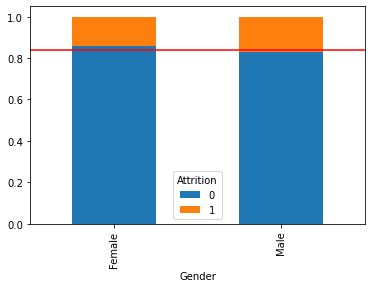

In [7]:
target_mean=data[target].mean()
temp = pd.crosstab(data[feature], data[target], normalize = 'index') #집계
temp.plot.bar(stacked=True)
plt.axhline(1-target_mean, color = 'r')
plt.show()

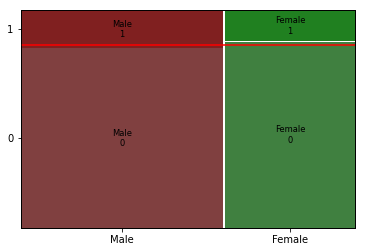

In [17]:
mosaic(data, [ feature, target])
plt.axhline(1- target_mean, color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 여자와 남자의 이직률이 거의 비슷하고 평균과 큰 차이가 없다

③ 가설검정(카이제곱검정)

In [19]:
kai=pd.crosstab(data[target], data[feature])
print('교차표\n', kai)
print('-' * 100)

result = spst.chi2_contingency(kai)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])

교차표
 Gender     Female  Male
Attrition              
0             421   629
1              69   131
----------------------------------------------------------------------------------------------------
카이제곱통계량 1.9782495940105371
p-value 0.15957492990528155
자유도 1


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

* 가설검정
    * 카이제곱통계량이 자유도의 2배가 안됨
    * p-value가 0.05보다 큼
    >성별과 이직율은 상관관계가 없다

#### 2) MaritalStatus --> Attrtion

In [22]:
feature='MaritalStatus'

① 교차표(pd.crosstab())

In [23]:
pd.crosstab(data[target], data[feature], normalize='columns')

MaritalStatus,Divorced,Married,Single
Attrition,,,
0,0.916667,0.878947,0.732673
1,0.083333,0.121053,0.267327


② 시각화( Stacked Bar, Mosaic)

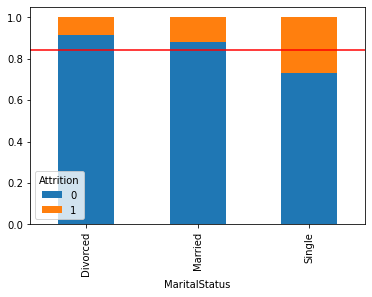

In [34]:
temp = pd.crosstab(data[feature], data[target], normalize = 'index') #집계
temp.plot.bar(stacked=True)
plt.axhline(1-target_mean, color = 'r')
plt.show()

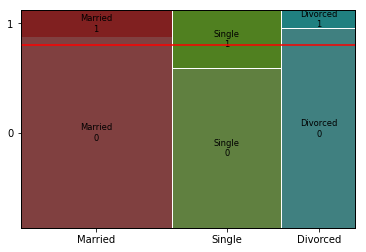

In [36]:
mosaic(data, [ feature, target])
plt.axhline(1- target_mean, color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

MaritalStatus(결혼상태)에 대한 고유값들이 영향이 있음

'single','Divorced','Married' 순으로 차이가남

③ 가설검정(카이제곱검정)

In [37]:
kai=pd.crosstab(data[target], data[feature])
print('교차표\n', kai)
print('-' * 100)

result = spst.chi2_contingency(kai)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])

교차표
 MaritalStatus  Divorced  Married  Single
Attrition                               
0                   253      501     296
1                    23       69     108
----------------------------------------------------------------------------------------------------
카이제곱통계량 53.12935546374186
p-value 2.9047385436211595e-12
자유도 2


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

* 가설검정
    * 카이제곱통계량이 크다
    * p-value가 0.05보다 작음
    >결혼상태과 이직율은 상관관계가 있다
    (중간?강한관계)

- p_value가 5%보다 작은 것으로 보아 결혼의 유무는 이직에 영향을 주는것으로 보임
- 기혼자가 이직률이 낮은 이유에 대해서는 책임질 가정이 있기 때문인것으로 보임
- 반대로 싱글의 경우 본인만 책임지면 되기때문에 상대적으로 이직률이 높은것으로 보임

#### 3) JobSatisfaction --> Attrtion

In [38]:
feature='JobSatisfaction'

① 교차표(pd.crosstab())

In [39]:
pd.crosstab(data[target], data[feature], normalize='columns')

JobSatisfaction,1,2,3,4
Attrition,,,,
0,0.788,0.834043,0.836957,0.879093
1,0.212,0.165957,0.163043,0.120907


② 시각화( Stacked Bar, Mosaic)

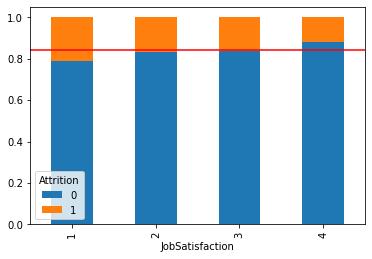

In [40]:
temp = pd.crosstab(data[feature], data[target], normalize = 'index') #집계
temp.plot.bar(stacked=True)
plt.axhline(1-target_mean, color = 'r')
plt.show()

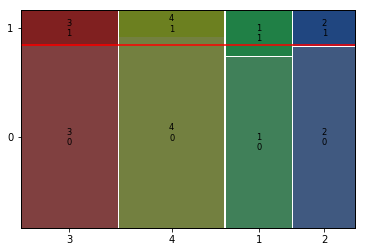

In [41]:
mosaic(data, [ feature, target])
plt.axhline(1- target_mean, color = 'r')
plt.show()

* 직업만족도의 '1'만 차이가 있음
다른 값은 평균과 거의 일치 > 차이가 없어보임

③ 가설검정(카이제곱검정)

In [ ]:
kai=pd.crosstab(data[target], data[feature])
print('교차표\n', kai)
print('-' * 100)

result = spst.chi2_contingency(kai)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])

시각화
- 본인의 직무에 아주 만족하지 못하는 1 그룹의 경우 이직률이 평균보다 높다
- 반대로 본인의 직무에 아주 만족하는 4그룹의 경우 이직률이 평균보다 낮음
- 상대적으로 만족도가 보통인 그룹의 경우 이직률이 평균과 거의 동일함


- 직무만족도가 이직에 영향을 미치긴하지만 크지는 않은것으로 보임
- 상대적으로 직무만족도가 보통인 그룹만 봐도 이직률이 평균과 동일한것으로보아 이것 외에 다른 이유가 있을것으로 보임

추가분석 : 1만 떼어서 얼마나 더 관련있는가 분석

④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

* 카이제곱통계량이 자유도의 2~3배와 같음 하지만 엄청 크지 않아서 약한 관계일것
* p-value 는 0.05보다 작지만 많이 작지 않음
    > 약한관계

### (2) 숫자형 Feature --> target

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) Age --> Attrtion


In [50]:
feature = 'Age'

① 그래프 : histogram, densityplot

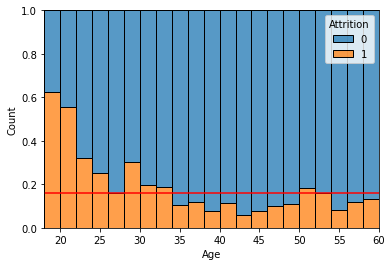

In [63]:
sns.histplot(x=feature, data = data, hue = target, multiple = 'fill', bins = 21)
#한칸 = 2
plt.axhline(target_mean, color = 'r')
plt.show()

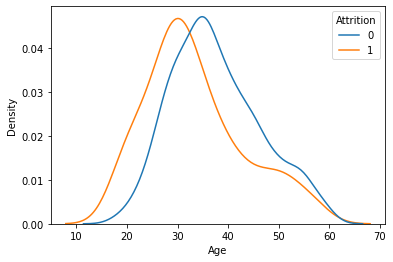

In [52]:
sns.kdeplot(x=feature, data = data, hue =target, common_norm=False)
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> 34세이하는 이직률이 평균보다 높고, 50세때 살짝 높아진다 ->50대때 이유조사

② 수치화 : 로지스틱회귀

In [64]:
temp = data.loc[data[feature].notnull()]

model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.424660
         Iterations 5
Age    4.667821e-100
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

* 그래프 
    * 그래프가 겹치는 부분(34세정도)에서 이직률이 반전됨
* 로지스틱회귀
    * p-value가 매우작음 
    > 강한관계

- 나이가 이직에 영향이 큰것으로 보임
- 상대적으로 20대 초반의 직원들의 이직률이 높은것으로 보아 회사의 만족도가 상대적으로 낮은것으로 보임
- 반대로 50대의 경우 이직률이 평균보다 높은것을 볼수있는데 승진이 안되거나 명퇴를 한 인원들이 있는것으로 보임

#### 2) DistanceFromHome --> Attrtion


In [65]:
feature = 'DistanceFromHome'

① 그래프 : histogram, densityplot

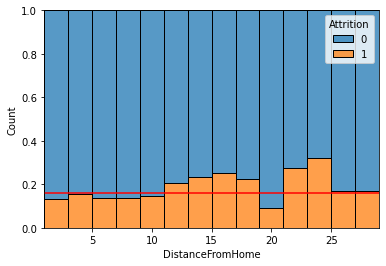

In [72]:
#한 구간 = 2
sns.histplot(x=feature, data = data, hue = target, multiple = 'fill', bins = 14)
plt.axhline(target_mean, color = 'r')
plt.show()

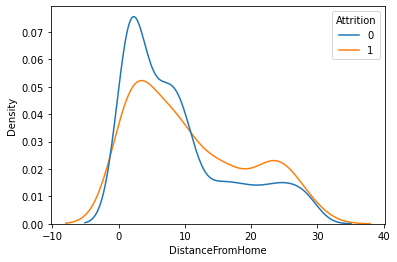

In [68]:
sns.kdeplot(x=feature, data = data, hue =target, common_norm=False)
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> 11 이후는 19-21 말고는 이직률이 평균보다 높거나 평균과 같다

② 수치화 : 로지스틱회귀

In [77]:
data[feature].isna().sum()

54

In [78]:
tmp=data.loc[data[feature].notnull()]
model = sm.Logit(tmp[target], tmp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.568793
         Iterations 6
DistanceFromHome    2.694280e-44
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

* p-value는 0.05보다 매우작음 
>강한관계


시각화 및 가설검정
- 거리가 먼 직원들이 이직을 하는 경우가 많은것으로 보임
- 10마일 이상의 직원들이 길이 막히는 출근시간에 촉박 할 것으로 예상됨
- 또한 왕복으로 하면 20마일이 넘어가므로 도로 위에서 보낼시간이 많을것으로 보임

#### 3) MonthlyIncome --> Attrtion


In [102]:
feature='MonthlyIncome'

① 그래프 : histogram, densityplot

In [82]:
data[feature].describe()

count     1250.000000
mean      6525.548000
std       4676.979554
min       1009.000000
25%       2932.250000
50%       4988.000000
75%       8437.500000
max      19999.000000
Name: MonthlyIncome, dtype: float64

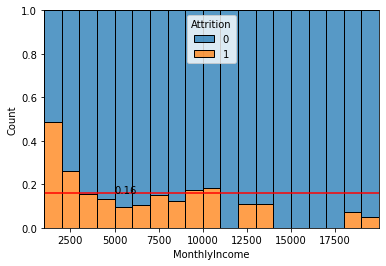

In [91]:
#한 구간 = 1000
sns.histplot(x=feature, data = data, hue = target, multiple = 'fill', bins = 19)
plt.text(5000,target_mean,target_mean)
plt.axhline(target_mean, color = 'r')
plt.show()

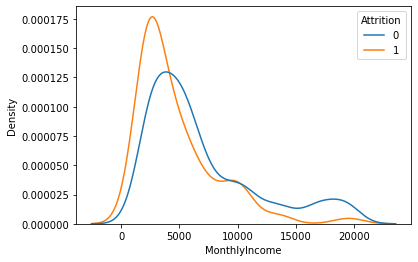

In [81]:
sns.kdeplot(x=feature, data = data, hue =target, common_norm=False)
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> 4000-9000, 11000제외하고 이직률이 높다 > 구간을 나눠서 추가분석

② 수치화 : 로지스틱회귀

In [92]:
model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.437401
         Iterations 6
MonthlyIncome    1.922717e-71
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

* p-value가 매우작다 (미봉책)
> 일단 강한 관계로 생각함

-5000달러 미만의 구간이 가장 이직률이 높은것으보아 대리급 및 사원급의 연봉이 동종업계 보다 작을것으로 예상됨
-10000달러 구간의 이직은 부장급들이 회사에 버티지 못하거나 창업을하여 이직한 경우일것으로 추측됨

## 4.관계 정리

### 1) 강한관계의 변수

MaritalStatus(결혼여부)   /  MonthlyIncome(월급) ,Age(나이)

### 2) 중간관계의 변수

 JobSatisfaction(직무만족도)-(약한관계)/ DistanceFromHom(집-직장거리)

### 3) (거의)관계 없음

Gender (성별)

## 5. 추가 분석

### 1) 분석1

#### MonthlyIncome --> Attrtion

#### 4000-9000, 11000제외하고 이직률이 높다 > 구간을 나눠서 추가분석

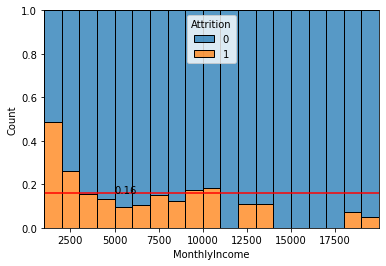

In [94]:
sns.histplot(x=feature, data = data, hue = target, multiple = 'fill', bins = 19)
plt.text(5000,target_mean,target_mean)
plt.axhline(target_mean, color = 'r')
plt.show()

In [7]:
feature='MonthlyIncome'

In [129]:
data[feature]

0       11691
1        9362
2       13348
3       17048
4        4127
        ...  
1245     4066
1246     2451
1247     4649
1248    16064
1249     4420
Name: MonthlyIncome, Length: 1250, dtype: int64

In [8]:
bin = [0,4000,10000,11000,np.inf]
label=['L','M','M1','H']
data['Income_grp']=pd.cut(data[feature], bins=bin, labels=label, right = False)
data['Income_grp']

0       H
1       M
2       H
3       H
4       M
       ..
1245    M
1246    L
1247    M
1248    H
1249    M
Name: Income_grp, Length: 1250, dtype: category
Categories (4, object): ['L' < 'M' < 'M1' < 'H']

In [9]:
print(data.loc[data[target]==1][target].count())  #이
data.loc[(data[target]==1)&(data['Income_grp']=='L')]
#이직자 200명 중 급여가 4000이하인 사람은 113명 

200


,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Income_grp
5,1,22,Travel_Frequently,Research & Development,4.0,1,Technical Degree,593,3,Male,...,16,3,0,4,3,3,2,2,2,L
18,1,58,Travel_Frequently,Research & Development,2.0,1,Life Sciences,918,4,Male,...,14,4,1,3,3,2,1,0,0,L
25,1,32,Travel_Frequently,Research & Development,16.0,1,Life Sciences,33,2,Female,...,22,2,0,10,5,3,10,2,7,L
27,1,32,Travel_Rarely,Research & Development,2.0,4,Life Sciences,1692,4,Male,...,12,1,0,1,2,3,1,0,0,L
40,1,28,Travel_Frequently,Sales,1.0,3,Technical Degree,1486,1,Male,...,15,4,1,5,3,4,3,2,2,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,1,30,Travel_Frequently,Research & Development,5.0,3,Medical,1017,2,Female,...,17,1,0,4,3,3,3,2,2,L
1216,1,19,Non-Travel,Research & Development,NaN,3,Medical,1248,1,Female,...,25,2,0,1,2,4,1,1,0,L
1227,1,22,Travel_Frequently,Research & Development,3.0,4,Life Sciences,1203,3,Male,...,11,2,1,1,5,3,0,0,0,L
1230,1,19,Travel_Rarely,Sales,21.0,3,Other,959,4,Male,...,13,2,0,1,3,4,1,0,0,L


* 이직자 200명
* 이직자이면서 월급이 4000달러 미만인 사람은 113명
 > 56.5%

In [10]:
table=pd.crosstab(data[target], data['Income_grp'])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])

카이제곱통계량 51.50203590632786
p-value 3.8240795614079515e-11
자유도 3


> 범주로 나누지 않고 검정했을 땐 로지스틱회귀는 미봉책이기 때문에
  구간을 나눠 자세하게 분석했다
  * 카이제곱통계량이 45이고 p-value도 0.05보다 작은것으로 보아 관계가 있다고 파악(중간관계)

## 2.데이터 전처리 

### 2.1 데이터 feature와 , target으로 분할

In [3]:
# target 과 feature 상관관계
data.corr()['Attrition']

Attrition                   1.000000
Age                        -0.170209
DistanceFromHome            0.081973
Education                  -0.036958
EmployeeNumber             -0.004939
EnvironmentSatisfaction    -0.097195
JobInvolvement             -0.130454
JobSatisfaction            -0.084364
MonthlyIncome              -0.166861
NumCompaniesWorked          0.054454
PercentSalaryHike           0.005901
RelationshipSatisfaction   -0.053857
StockOptionLevel           -0.139003
TotalWorkingYears          -0.185029
TrainingTimesLastYear      -0.055715
WorkLifeBalance            -0.037603
YearsAtCompany             -0.149750
YearsInCurrentRole         -0.176072
YearsWithCurrManager       -0.167656
Name: Attrition, dtype: float64

In [5]:
# 불필요한 변수 제거 : 사번은 고유번호로 이직률에 영향이 없다고 판단하여 삭제
data.drop('EmployeeNumber', axis = 1, inplace = True)

In [6]:
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### 2.2 NaN에 대한 조치

In [7]:
x.isna().sum()

Age                          0
BusinessTravel               0
Department                   0
DistanceFromHome            54
Education                    0
EducationField               0
EnvironmentSatisfaction      0
Gender                       0
JobInvolvement               0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked          21
OverTime                     0
PercentSalaryHike            0
RelationshipSatisfaction     0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsWithCurrManager         0
dtype: int64

* NaN은 KNN Imputer로 채울 예정.
    * KNN Imputer는 가변수화가 된 상태에서 사용 가능.

### 2.3 가변수화
* 범주형 데이터이면서 값이 0,1 로 되어 있는 것이 아니라면, 가변수화를 수행해야 함

In [8]:
dum_cols = ['BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender', 
            'JobRole', 'JobInvolvement', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'RelationshipSatisfaction',
            'StockOptionLevel','WorkLifeBalance' ]

x = pd.get_dummies(x, columns = dum_cols ,drop_first = True)
x.head()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,...,OverTime_Yes,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,33,7.0,11691,0.0,11,14,3,13,9,7,...,0,0,0,1,0,0,0,0,0,1
1,35,18.0,9362,2.0,11,10,2,2,2,2,...,0,0,1,0,0,0,0,0,1,0
2,42,6.0,13348,9.0,13,18,3,13,7,7,...,0,1,0,0,1,0,0,0,0,1
3,46,2.0,17048,8.0,23,28,2,26,15,9,...,0,0,0,0,0,0,0,0,1,0
4,39,NaN,4127,2.0,18,7,6,2,1,2,...,0,0,0,1,1,0,0,0,1,0


* KNNImputer 수행

In [9]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(x)

# 데이터프레임으로 다시 만듦
x = pd.DataFrame(imputed, columns=x.columns)
x.isna().sum()

Age                                  0
DistanceFromHome                     0
MonthlyIncome                        0
NumCompaniesWorked                   0
PercentSalaryHike                    0
TotalWorkingYears                    0
TrainingTimesLastYear                0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsWithCurrManager                 0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Research & Development    0
Department_Sales                     0
Education_2                          0
Education_3                          0
Education_4                          0
Education_5                          0
EducationField_Life Sciences         0
EducationField_Marketing             0
EducationField_Medical               0
EducationField_Other                 0
EducationField_Technical Degree      0
EnvironmentSatisfaction_2            0
EnvironmentSatisfaction_3            0
EnvironmentSatisfaction_4

### 2.5 데이터 분할

* test 200건, val 200건

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# data ==> train, test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=200, random_state = 2022)

In [12]:
# train ==> train : val
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=200, random_state = 2022)

### 2.6 스케일링 

In [13]:
from sklearn.preprocessing import MinMaxScaler
col_x = list(x)
scaler = MinMaxScaler()

x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)
x_test_s = scaler.transform(x_test)

## 3.모델링 : 머신러닝

### 3.1 모델링을 위한 함수 불러오기

In [14]:
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### 3.2 모델링

#### (1) Logistic Regression 모델링

In [66]:
model_lr = LogisticRegression(max_iter=470)
model_lr.fit(x_train, y_train)

LogisticRegression(max_iter=470)

In [67]:
# 예측 및 평가
val_pred_lr = model_lr.predict(x_val)

print(classification_report(y_val, val_pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       176
           1       0.73      0.33      0.46        24

    accuracy                           0.91       200
   macro avg       0.82      0.66      0.70       200
weighted avg       0.89      0.91      0.89       200



In [68]:
result_report={}
result_report['Logistic Regression']=classification_report(y_val, val_pred_lr)

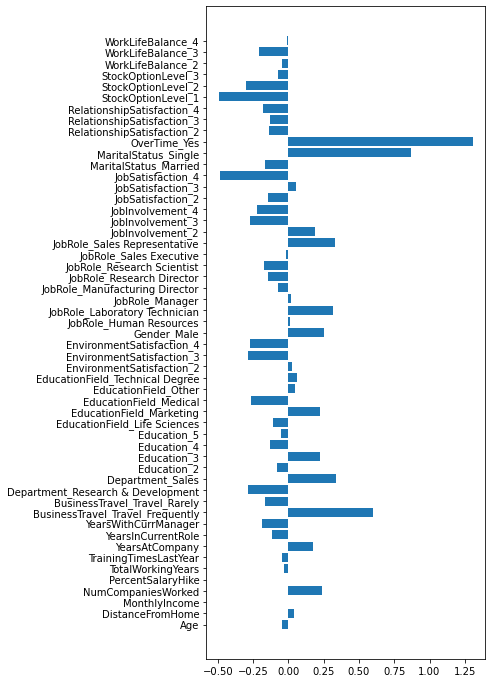

In [69]:
# 변수 가중치 시각화
plt.figure(figsize=(5,12))
plt.barh(y=list(x), width=model_lr.coef_.reshape(-1))
plt.show()

#### (2) Decision Tree 모델링

In [19]:
model_dt = DecisionTreeClassifier(random_state=2022)
param = {'max_depth' : range(1,51) }

model = GridSearchCV(model_dt, param, cv=5, scoring='accuracy')

In [20]:
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'max_depth': range(1, 51)}, scoring='accuracy')

In [21]:
# 최적의 파라미터 확인
print(model.best_estimator_)
print('파라미터: ', model.best_params_)
print('성능: ', model.best_score_)

DecisionTreeClassifier(max_depth=4, random_state=2022)
파라미터:  {'max_depth': 4}
성능:  0.8400000000000001


In [22]:
y_pred = model.predict(x_test)

In [23]:
result_report['Decision Tree']=classification_report(y_test, y_pred)

In [24]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.885
              precision    recall  f1-score   support

           0       0.90      0.98      0.93       169
           1       0.75      0.39      0.51        31

    accuracy                           0.89       200
   macro avg       0.82      0.68      0.72       200
weighted avg       0.87      0.89      0.87       200



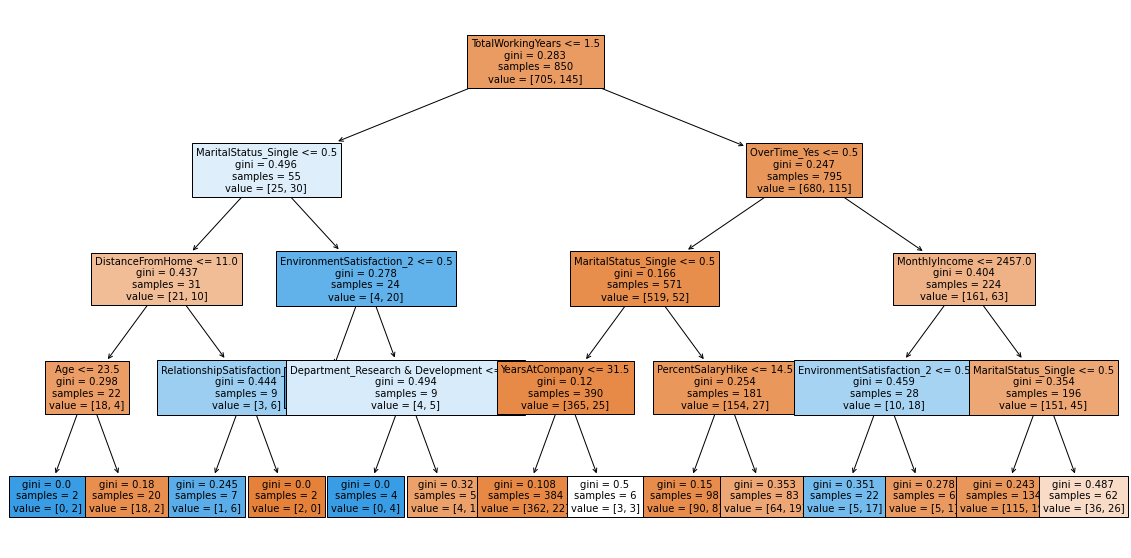

In [25]:
# 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model.best_estimator_,
         filled=True,
         feature_names=list(x),
         fontsize=10)
plt.show()

#### (3) KNN 모델링

In [59]:
m_knn = KNeighborsClassifier()

params = {'n_neighbors':range(3,20)}
m_knn_gs = GridSearchCV(m_knn, param_grid = params)

In [60]:
m_knn_gs.fit(x_train_s, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(3, 20)})

In [61]:
# 최적파라미터, 성능 확인
print('최적파라미터: ', m_knn_gs.best_params_)
print('성능: ', m_knn_gs.best_score_)

최적파라미터:  {'n_neighbors': 7}
성능:  0.8352941176470589


In [62]:
val_pred_knn = m_knn_gs.predict(x_val_s)

print(confusion_matrix(y_val, val_pred_knn))
print('-'*50)
print(classification_report(y_val, val_pred_knn))

[[172   4]
 [ 20   4]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.98      0.93       176
           1       0.50      0.17      0.25        24

    accuracy                           0.88       200
   macro avg       0.70      0.57      0.59       200
weighted avg       0.85      0.88      0.85       200



In [30]:
result_report['KNN']=classification_report(y_test, val_pred_knn)

#### (4) SVM 모델링

In [31]:
model_svm = SVC()
params ={
    'C': [0.05, 0.1,0.2,1,5,10],
    'gamma' : [0.1,1,5,10, 50]}

m_svm_gs = GridSearchCV(model_svm, param_grid = params, cv = 5)

In [32]:
m_svm_gs.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.05, 0.1, 0.2, 1, 5, 10],
                         'gamma': [0.1, 1, 5, 10, 50]})

In [33]:
# 최적파라미터, 성능 확인
print('최적파라미터: ', m_svm_gs.best_params_)
print('성능: ', m_svm_gs.best_score_)

최적파라미터:  {'C': 1, 'gamma': 0.1}
성능:  0.8482352941176471


In [34]:
val_pred_svm = m_svm_gs.predict(x_val_s)
result_report['SVM']=classification_report(y_test, val_pred_svm)
print(classification_report(y_val, val_pred_svm))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       176
           1       0.00      0.00      0.00        24

    accuracy                           0.88       200
   macro avg       0.44      0.50      0.47       200
weighted avg       0.77      0.88      0.82       200



#### (5) Random Forest 모델링

In [48]:
model_rf = RandomForestClassifier()

In [49]:
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [50]:
y_pred = model_rf.predict(x_test)

In [51]:
result_report['Random Forest']=classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       169
           1       0.88      0.23      0.36        31

    accuracy                           0.88       200
   macro avg       0.88      0.61      0.64       200
weighted avg       0.88      0.88      0.84       200



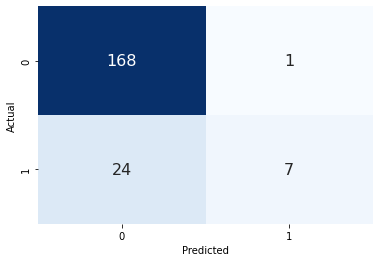

In [52]:
# 시각화
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, 
            cmap="Blues", 
            cbar=False,
            annot_kws={'size':16},
            fmt='g'  
           )
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### (6) XGB 모델링

In [113]:
params = {'max_depth': range(2,6), 
          'n_estimators' : range(20,201,10),
          'learning_rate':[0.01,0.1,0.2]}

model = XGBClassifier()
model_rs = RandomizedSearchCV(model, params, n_iter = 20, cv = 10)
model_rs.fit(x_train, y_train)

[23:57:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:57:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:57:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:57:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:57:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:57:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:57:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:57:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:57:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                    

In [117]:
val_pred_xgb = model_rs.predict(x_val)
result_report['XGB']=classification_report(y_test, val_pred_xgb)
print(classification_report(y_val, val_pred_xgb))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       176
           1       0.55      0.25      0.34        24

    accuracy                           0.89       200
   macro avg       0.73      0.61      0.64       200
weighted avg       0.86      0.89      0.87       200



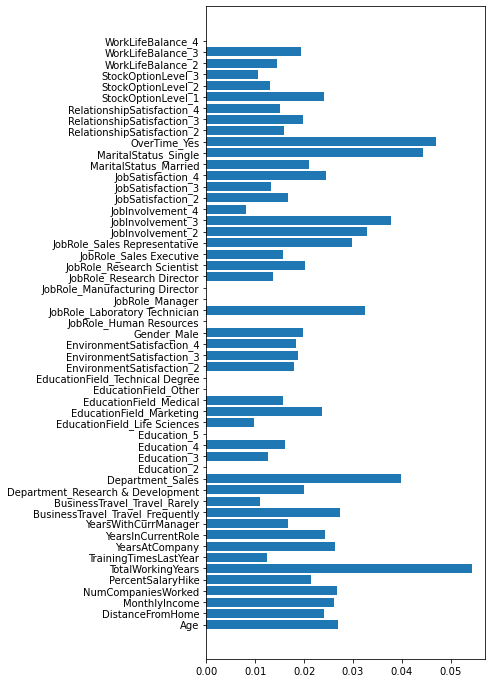

In [116]:
# 변수 중요도 시각화
plt.figure(figsize=(5,12))
plt.barh(y=list(x), width=model_rs.best_estimator_.feature_importances_) 
plt.show()

## 4.모델링 : 딥러닝

### 4.1 모델링을 위한 함수 불러오기

In [122]:
import tensorflow as tf
from tensorflow import keras
from keras.backend import clear_session
from keras.layers import Dense
from keras.models import Sequential

In [121]:
x_train.shape, y_train.shape

((850, 53), (850,))

### 4.2 모델 설계

In [124]:
input = x_train.shape[1]
print(input)
batch = 128
epochs = 100

53


### 1) 모델1

In [125]:
clear_session()

model1 = Sequential()
model1.add(Dense(8,input_shape=(input,), activation = 'relu'))
model1.add(Dense(1, activation= 'sigmoid'))
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam') 
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 432       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 441
Trainable params: 441
Non-trainable params: 0
_________________________________________________________________


### 2) 모델2

In [127]:
clear_session()

model2 = Sequential()
model2.add(Dense(50,input_shape=(input,), activation = 'relu'))
model2.add(Dense(32, activation = 'relu'))
model2.add(Dense(1, activation= 'sigmoid'))
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam',metrics=['accuracy']) 
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                2700      
                                                                 
 dense_1 (Dense)             (None, 32)                1632      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,365
Trainable params: 4,365
Non-trainable params: 0
_________________________________________________________________


### 3) 모델3

In [128]:
clear_session()

model3 = Sequential()
model3.add(Dense(50,input_shape=(input,), activation = 'relu'))
model3.add(Dense(32, activation = 'relu'))
model3.add(Dense(16, activation = 'relu'))
model3.add(Dense(1, activation= 'sigmoid'))
model3.compile(loss = 'binary_crossentropy', optimizer = 'adam')  
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                2700      
                                                                 
 dense_1 (Dense)             (None, 32)                1632      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4,877
Trainable params: 4,877
Non-trainable params: 0
_________________________________________________________________


### 4.3 학습 및 최적화

In [144]:
# m1
model1.fit(x_train_s, y_train, epochs = 100)
val_pred_dl1 = model1.predict(x_val)
val_pred_dl1 = np.where(val_pred_dl1 >= .5, 1, 0)
result_report['model1']=classification_report(y_test, val_pred_dl1)

Epoch 1/100
27/27 [==============================] - 0s 2ms/step - loss: 0.4531
Epoch 2/100
27/27 [==============================] - 0s 2ms/step - loss: 0.4332
Epoch 3/100
27/27 [==============================] - 0s 2ms/step - loss: 0.4103
Epoch 4/100
27/27 [==============================] - 0s 2ms/step - loss: 0.3859
Epoch 5/100
27/27 [==============================] - 0s 2ms/step - loss: 0.3665
Epoch 6/100
27/27 [==============================] - 0s 2ms/step - loss: 0.3532
Epoch 7/100
27/27 [==============================] - 0s 2ms/step - loss: 0.3430
Epoch 8/100
27/27 [==============================] - 0s 2ms/step - loss: 0.3367
Epoch 9/100
27/27 [==============================] - 0s 2ms/step - loss: 0.3296
Epoch 10/100
27/27 [==============================] - 0s 2ms/step - loss: 0.3247
Epoch 11/100
27/27 [==============================] - 0s 2ms/step - loss: 0.3205
Epoch 12/100
27/27 [==============================] - 0s 2ms/step - loss: 0.3168
Epoch 13/100
27/27 [=================

In [141]:
# m2
model2.fit(x_train, y_train, epochs = 100)
val_pred_dl2 = model2.predict(x_val)
val_pred_dl2 = np.where(val_pred_dl2 >= .5, 1, 0)
result_report['model2']=classification_report(y_test, val_pred_dl2)

Epoch 1/100
27/27 [==============================] - 0s 2ms/step - loss: 0.4044
Epoch 2/100
27/27 [==============================] - 0s 2ms/step - loss: 1.0942
Epoch 3/100
27/27 [==============================] - 0s 1ms/step - loss: 0.7249
Epoch 4/100
27/27 [==============================] - 0s 2ms/step - loss: 1.0348
Epoch 5/100
27/27 [==============================] - 0s 2ms/step - loss: 1.0319
Epoch 6/100
27/27 [==============================] - 0s 2ms/step - loss: 0.7214
Epoch 7/100
27/27 [==============================] - 0s 2ms/step - loss: 1.1562
Epoch 8/100
27/27 [==============================] - 0s 2ms/step - loss: 0.7289
Epoch 9/100
27/27 [==============================] - 0s 2ms/step - loss: 0.6219
Epoch 10/100
27/27 [==============================] - 0s 2ms/step - loss: 0.7019
Epoch 11/100
27/27 [==============================] - 0s 2ms/step - loss: 0.4314
Epoch 12/100
27/27 [==============================] - 0s 2ms/step - loss: 0.5704
Epoch 13/100
27/27 [=================

In [142]:
# m3
model3.fit(x_train, y_train, epochs = 100)
val_pred_dl3 = model3.predict(x_val)
val_pred_dl3 = np.where(val_pred_dl3 >= .5, 1, 0)
result_report['model3']=classification_report(y_test, val_pred_dl3)

Epoch 1/100
27/27 [==============================] - 0s 2ms/step - loss: 0.4449
Epoch 2/100
27/27 [==============================] - 0s 2ms/step - loss: 0.7234
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 1.7842
Epoch 4/100
27/27 [==============================] - 0s 2ms/step - loss: 0.5257
Epoch 5/100
27/27 [==============================] - 0s 2ms/step - loss: 0.5987
Epoch 6/100
27/27 [==============================] - 0s 2ms/step - loss: 0.4936
Epoch 7/100
27/27 [==============================] - 0s 2ms/step - loss: 1.9584
Epoch 8/100
27/27 [==============================] - 0s 2ms/step - loss: 1.8266
Epoch 9/100
27/27 [==============================] - 0s 2ms/step - loss: 0.9589
Epoch 10/100
27/27 [==============================] - 0s 2ms/step - loss: 0.6569
Epoch 11/100
27/27 [==============================] - 0s 2ms/step - loss: 0.5949
Epoch 12/100
27/27 [==============================] - 0s 2ms/step - loss: 0.9197
Epoch 13/100
27/27 [=================

## 5.성능 비교

### 5.1 평가지표 결정

- Precision(정밀도)은 모델이 True라고 분류한 것 중에서 실제 True인 것의 비율이다.
- Recall(재현율)은 실제 True인 것 중에서 모델이 True라고 예측한 것의 비율입니다. 
- Precision은 모델의 입장에서, Recall은 실제 정답(data)의 입장에서 정답을 정답이라고 맞춘 경우를 바라봄
- F1 score는 Precision과 Recall의 조화평균입니다. 정밀도와 재현율이 비슷할 수록 F1 score도 높아진다.
    F1 score는 데이터 label이 불균형 구조일 때, 모델의 성능을 정확하게 평가할 수 있고, 성능을 하나의 숫자로 표현할 수 있다.

이직할 것이라 예상한 사람들 중에 실제 이직한 사람들의 비율이기 때문에 정밀도(Precision)를 활용하여 사전에 이직할 직원을 찾는 목표로 둔다.

#### 그래서 Precision로 성능을 평가하는 지표로 삼았다.

Precision로 성능을 비교 했을 때 Random Forest가 0.89로 가장 높게 측정 되었음.

따라서, **Random Forest**를 대표 모델로 지정하도록 한다.

### 5.2 성능 비교

In [145]:
print("< classification_report >")

for m_name, score in result_report.items():
    print('=' * 40)
    print(m_name)
    print(score)

< classification_report >
Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       176
           1       0.82      0.38      0.51        24

    accuracy                           0.92       200
   macro avg       0.87      0.68      0.73       200
weighted avg       0.91      0.92      0.90       200

Decision Tree
              precision    recall  f1-score   support

           0       0.90      0.98      0.93       169
           1       0.75      0.39      0.51        31

    accuracy                           0.89       200
   macro avg       0.82      0.68      0.72       200
weighted avg       0.87      0.89      0.87       200

KNN
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       169
           1       0.12      0.03      0.05        31

    accuracy                           0.81       200
   macro avg       0.48      0.50      0.47       200
weighted a

------

### 추가분석

In [73]:
df=data.copy()

In [79]:
df.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')

In [81]:
df.groupby(['TotalWorkingYears','Department'])[target].mean()

TotalWorkingYears  Department            
0                  Research & Development    0.333333
                   Sales                     0.750000
1                  Human Resources           1.000000
                   Research & Development    0.460000
                   Sales                     0.611111
                                               ...   
36                 Sales                     0.000000
37                 Research & Development    0.000000
                   Sales                     0.000000
38                 Sales                     0.000000
40                 Research & Development    1.000000
Name: Attrition, Length: 104, dtype: float64

> 0~1년차 직원 중 Sales와 Human Resources 부서의 이직율이 높은 경향을 보임
특히, Sales부서가 높다.

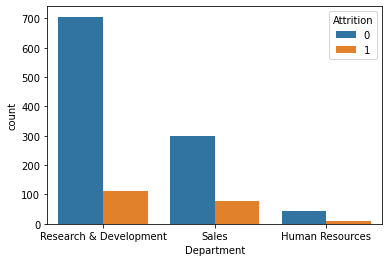

In [86]:
sns.countplot(data = df, x='Department', hue=target)
plt.show()

> 각 부서 전체 비율 대 이직수를 비교했을때 Sales부서의 이직율이 더 높다

In [87]:
df.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,0,33,Travel_Rarely,Research & Development,7.0,3,Medical,817,3,Male,...,No,11,4,0,14,3,4,13,9,7
1,0,35,Travel_Frequently,Research & Development,18.0,2,Life Sciences,1412,3,Male,...,No,11,3,0,10,2,3,2,2,2
2,0,42,Travel_Rarely,Research & Development,6.0,3,Medical,1911,3,Male,...,No,13,2,1,18,3,4,13,7,7
3,0,46,Travel_Rarely,Sales,2.0,3,Marketing,1204,3,Female,...,No,23,1,0,28,2,3,26,15,9
4,0,39,Travel_Frequently,Sales,NaN,3,Life Sciences,1812,3,Male,...,No,18,4,1,7,6,3,2,1,2


In [97]:
junior=df.loc[df['TotalWorkingYears'].between(0,1)][['MonthlyIncome','Department']]
junior

,MonthlyIncome,Department
27,1393,Research & Development
29,2933,Research & Development
93,1569,Sales
95,1009,Research & Development
100,2515,Research & Development
...,...,...
1194,1790,Sales
1204,2564,Human Resources
1216,1859,Research & Development
1227,2853,Research & Development


<AxesSubplot:xlabel='Department', ylabel='count'>

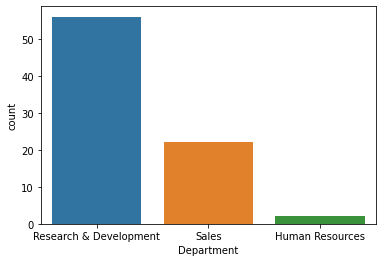

In [101]:
sns.countplot(data=df, x='Department')

<AxesSubplot:xlabel='Department', ylabel='MonthlyIncome'>

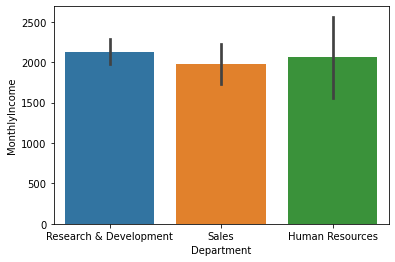

In [103]:
sns.barplot(x="Department", y="MonthlyIncome", data = junior)


> 0~1년차 부서 중 판매 부서의 수입이 가장 적음. 판매 부서의 수입에 대한 개선이 필요해 보임

---

# 인사 프로그램 제안

#### 1. 채용 과정 개선
- 신입들 사이에서는 본인이 예상한 일과 실제 업무의 차이로 인한 이직도 발생한다. 
- 채용공고에서 직무에 대한 정확한 정보를 제공함으로써 실제 지원자가 입사해서 어떤 환경에서 어떤 일을 수행해야 하는지 명확하게 알려준다.

#### 2. 조직문화 적응
- 연차가 낮은 사람들이 많이 이탈하는 경향을 보인다. 0-1년 차는 회사에 아직 적응하는 단계라고 볼 수 있을 것이다.
- 조직과 개인, 동료 간의 유대감을 높이는 과정을 통해 이직률을 감소시킬 수 있을 것이다.

예시)
>사내 멘토링 프로그램을 구축해서 팀원들과의 유대감을 높인다.

> 입사 초기에 오리엔테이션 등을 그룹으로 진행, 회사의 일원이 되어가는 초기 프로세스를 단계별로 구축하고 명확한 정보와 플랜을 제공한다. 

#### 3. 근무 시간 조정
- 유연근무,재택근무 등의 도입을 통해 직원들의 업무 집중도를 높인다. 
- 남는 시간에는 자기계발이나 휴식을 할 수 있으므로 워라밸에 대한 불만이 줄어들 것이다.

#### 4. 성과에 대한 보상
- 나이가 어릴수록 이직할 확률이 높아지는 것을 확인 할 수 있었다.
- 젊은 세대는 공정과 형평성을 중요시 한다.


예시)
> 공정한 인사평가 제도를 구축하고 보상에 대한 합리적인 프로세스를 마련해야 한다.

> 직원의 능력에 따라 합리적인 성과급을 제공한다.

> 자신이 하는 일이 얼마나 회사에 기여하였는지 알 수 있도록 하고,  성취할 수 있는 목표를 꾸준히 제공하는 것이 필요하다. 

> 비전을 제시하고 회사의 미래를 함께하고 싶다는 생각을 하게 만드는 것이 중요할 것이다.

#### 5. 커뮤니케이션을 통한 이직 원인 파악
- 퇴사의사가 있다면, 인사팀과의 상담을 진행하고 원인을 파악한다.
- 만일 직무에 대한 불만이 있다면 직원의 퍼포먼스나 적성등을 파악하고, 가능하다면 TO가 있는 다른 부서로 가는 것을 제안한다.

#### 6. 판매 부서를 위한 인사 프로그램
- 판매 부서의 월급 인상 또는 복지 개선이 이루어져야 한다.

예시
> 고객과 마찰이 많은 판매부서의 업무 강도를 줄임

> 업무로 인해 발생하는 통신비 / 교통비를 적극 지원

> 이동 시간도 업무 시간에 포함하여 별도의 휴게시간 보장

> 업무상 재택근무가 불가하니 연차나 유연 근무제를 적극 권장

> 개인 성장을 도모할 수 있는 개인역량 강화 지원 확대

> 업무상의 과부하로 인해 발생하는 직업병에 대비해 건강보험 및 산재보험에 신경을 써야 함